In [170]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('RdBu')


In [171]:
#importing the Data
df=pd.read_excel('./Salla Call Center Dataset.xlsx')

In [172]:
#Business understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Project                         267 non-null    object        
 1   Date                            267 non-null    datetime64[ns]
 2   Month                           267 non-null    object        
 3   Forecasted Calls                267 non-null    int64         
 4   Calls Offered                   267 non-null    int64         
 5   Calls Handled                   267 non-null    int64         
 6   Calls Handled With in Thrshold  267 non-null    int64         
 7   Calls Abandon                   267 non-null    int64         
 8   ASA                             267 non-null    float64       
 9   Answer Time                     267 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 21.0+ 

In [173]:
df.shape

(267, 10)

In [174]:
df.head()

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time
0,Project A,2022-02-01,Feb-2022,13473,8393,8381,8380,12,1.689178,14157.0
1,Project A,2022-02-02,Feb-2022,13255,5144,5134,5096,10,2.337164,11999.0
2,Project A,2022-02-03,Feb-2022,13209,8450,8436,8432,14,1.874822,15816.0
3,Project A,2022-02-04,Feb-2022,13002,10883,10614,7376,269,51.207744,543519.0
4,Project A,2022-02-05,Feb-2022,12758,11445,11393,11027,52,7.235232,82431.0


In [175]:
# Data Wrangling (Data Cleaning, Data Processing)

df.isna().any()

Project                           False
Date                              False
Month                             False
Forecasted Calls                  False
Calls Offered                     False
Calls Handled                     False
Calls Handled With in Thrshold    False
Calls Abandon                     False
ASA                               False
Answer Time                       False
dtype: bool

In [176]:
df.duplicated().any()

np.False_

In [177]:
df.describe()

,Date,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time
count,267,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02
mean,2022-03-17 00:00:00,9127.606742,6535.149813,6448.846442,5950.876404,86.303371,9.220929,9.224000e+04
min,2022-02-01 00:00:00,213.000000,81.000000,79.000000,75.000000,0.000000,1.578571,1.720000e+02
25%,2022-02-23 00:00:00,2674.000000,1834.500000,1824.500000,1804.000000,5.000000,1.875656,5.325500e+03
50%,2022-03-17 00:00:00,12477.000000,6601.000000,6592.000000,6291.000000,12.000000,2.743916,1.337400e+04
75%,2022-04-08 00:00:00,13208.000000,8885.000000,8809.000000,8153.500000,42.000000,6.748759,3.149700e+04
max,2022-04-30 00:00:00,17685.000000,30381.000000,29630.000000,22741.000000,3101.000000,180.903391,2.688948e+06
std,NaN,5926.564904,5255.978390,5118.075138,4571.721375,287.741271,19.585007,2.883870e+05


In [178]:
df.describe(include=object)

,Project,Month
count,267,267
unique,3,3
top,Project A,Mar-2022
freq,89,93


In [179]:
df.sample(10)

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time
263,Project C,2022-04-27,Apr-2022,291,166,158,145,8,8.411392,1329.0
4,Project A,2022-02-05,Feb-2022,12758,11445,11393,11027,52,7.235232,82431.0
75,Project C,2022-02-20,Feb-2022,213,126,125,125,1,1.832000,229.0
229,Project B,2022-04-23,Apr-2022,11769,5020,5017,5017,3,1.694638,8502.0
89,Project A,2022-03-06,Mar-2022,13843,15328,14652,9230,676,67.762626,992858.0
93,Project A,2022-03-10,Mar-2022,12545,10402,10275,9585,127,17.342676,178196.0
148,Project C,2022-03-03,Mar-2022,2674,3075,3033,2839,42,10.715134,32499.0
106,Project A,2022-03-23,Mar-2022,13134,6788,6768,6765,20,1.881058,12731.0
142,Project B,2022-03-28,Mar-2022,17370,18046,17926,17727,120,3.085574,55312.0
13,Project A,2022-02-14,Feb-2022,11943,6506,6496,6496,10,1.682728,10931.0


In [180]:
#Convert Data type

df['Date'] = pd.to_datetime(df['Date'])


In [181]:
df['Year'] = pd.to_datetime(df['Month'], errors='coerce')
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

C:\Users\Merna Ahmed\AppData\Local\Temp\ipykernel_108\2601458235.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Month'], errors='coerce')
C:\Users\Merna Ahmed\AppData\Local\Temp\ipykernel_108\2601458235.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce')


In [182]:
df['Month_']=df['Month'].dt.month_name()
df

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time,Year,Month_
0,Project A,2022-02-01,2022-02-01,13473,8393,8381,8380,12,1.689178,14157.0,2022-02-01,February
1,Project A,2022-02-02,2022-02-01,13255,5144,5134,5096,10,2.337164,11999.0,2022-02-01,February
2,Project A,2022-02-03,2022-02-01,13209,8450,8436,8432,14,1.874822,15816.0,2022-02-01,February
3,Project A,2022-02-04,2022-02-01,13002,10883,10614,7376,269,51.207744,543519.0,2022-02-01,February
4,Project A,2022-02-05,2022-02-01,12758,11445,11393,11027,52,7.235232,82431.0,2022-02-01,February
...,...,...,...,...,...,...,...,...,...,...,...,...
262,Project C,2022-04-26,2022-04-01,294,164,163,163,1,1.883436,307.0,2022-04-01,April
263,Project C,2022-04-27,2022-04-01,291,166,158,145,8,8.411392,1329.0,2022-04-01,April
264,Project C,2022-04-28,2022-04-01,288,149,142,130,7,7.429577,1055.0,2022-04-01,April
265,Project C,2022-04-29,2022-04-01,219,137,136,132,1,4.426471,602.0,2022-04-01,April


In [183]:
df['Year']=df['Month'].dt.year
df

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time,Year,Month_
0,Project A,2022-02-01,2022-02-01,13473,8393,8381,8380,12,1.689178,14157.0,2022,February
1,Project A,2022-02-02,2022-02-01,13255,5144,5134,5096,10,2.337164,11999.0,2022,February
2,Project A,2022-02-03,2022-02-01,13209,8450,8436,8432,14,1.874822,15816.0,2022,February
3,Project A,2022-02-04,2022-02-01,13002,10883,10614,7376,269,51.207744,543519.0,2022,February
4,Project A,2022-02-05,2022-02-01,12758,11445,11393,11027,52,7.235232,82431.0,2022,February
...,...,...,...,...,...,...,...,...,...,...,...,...
262,Project C,2022-04-26,2022-04-01,294,164,163,163,1,1.883436,307.0,2022,April
263,Project C,2022-04-27,2022-04-01,291,166,158,145,8,8.411392,1329.0,2022,April
264,Project C,2022-04-28,2022-04-01,288,149,142,130,7,7.429577,1055.0,2022,April
265,Project C,2022-04-29,2022-04-01,219,137,136,132,1,4.426471,602.0,2022,April


In [184]:
df['Day']=df['Date'].dt.day_name()
df

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time,Year,Month_,Day
0,Project A,2022-02-01,2022-02-01,13473,8393,8381,8380,12,1.689178,14157.0,2022,February,Tuesday
1,Project A,2022-02-02,2022-02-01,13255,5144,5134,5096,10,2.337164,11999.0,2022,February,Wednesday
2,Project A,2022-02-03,2022-02-01,13209,8450,8436,8432,14,1.874822,15816.0,2022,February,Thursday
3,Project A,2022-02-04,2022-02-01,13002,10883,10614,7376,269,51.207744,543519.0,2022,February,Friday
4,Project A,2022-02-05,2022-02-01,12758,11445,11393,11027,52,7.235232,82431.0,2022,February,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Project C,2022-04-26,2022-04-01,294,164,163,163,1,1.883436,307.0,2022,April,Tuesday
263,Project C,2022-04-27,2022-04-01,291,166,158,145,8,8.411392,1329.0,2022,April,Wednesday
264,Project C,2022-04-28,2022-04-01,288,149,142,130,7,7.429577,1055.0,2022,April,Thursday
265,Project C,2022-04-29,2022-04-01,219,137,136,132,1,4.426471,602.0,2022,April,Friday


In [185]:
# Analysing The Data

df['Project'].value_counts()

Project
Project A    89
Project B    89
Project C    89
Name: count, dtype: int64

In [186]:
df['Month_'].value_counts()

Month_
March       93
April       90
February    84
Name: count, dtype: int64

In [187]:
df['Month_'].value_counts(normalize=True)*100

Month_
March       34.831461
April       33.707865
February    31.460674
Name: proportion, dtype: float64

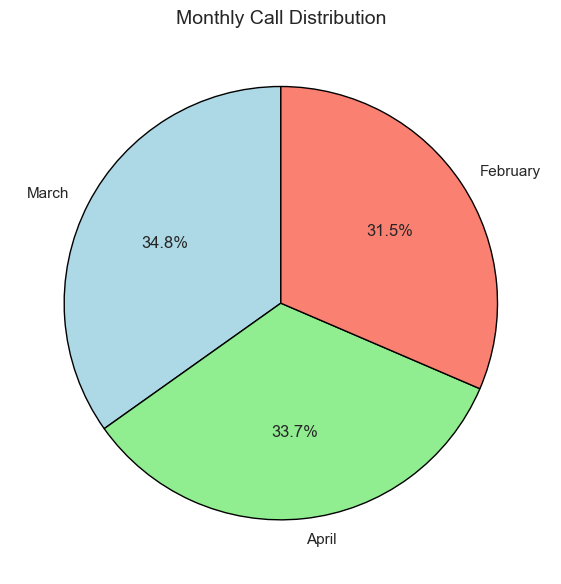

In [188]:
Month_Distribution = df['Month_'].value_counts()

plt.figure(figsize=(6,6))
Month_Distribution.plot(kind='pie', 
                     autopct='%1.1f%%', 
                     startangle=90, 
                     colors=['lightblue', 'lightgreen', 'salmon'], 
                     wedgeprops={'edgecolor': 'black'})  

plt.title('Monthly Call Distribution', fontsize=14)
plt.ylabel('')  

plt.tight_layout()

plt.show()

In [189]:
df['Day'].value_counts()

Day
Tuesday      39
Wednesday    39
Thursday     39
Friday       39
Saturday     39
Sunday       36
Monday       36
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

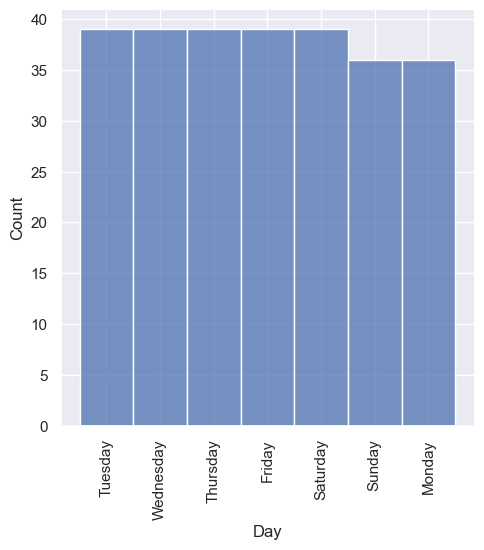

In [190]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['Day'])
plt.xticks(rotation=90)
plt.show()

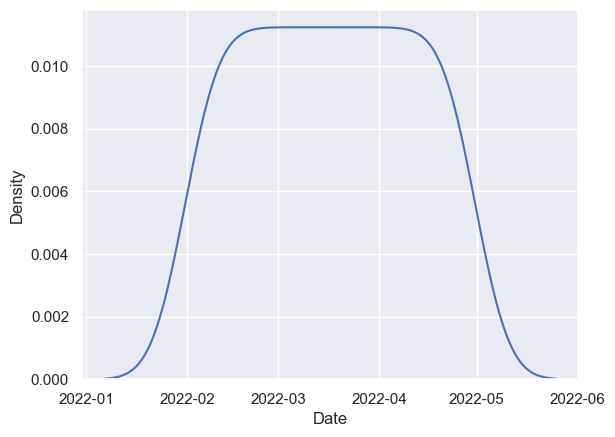

In [191]:
sns.kdeplot(df["Date"])
plt.show()

In [192]:
df.sample(10)

,Project,Date,Month,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time,Year,Month_,Day
209,Project B,2022-04-03,2022-04-01,13261,6022,6001,5971,21,2.490585,14946.0,2022,April,Sunday
35,Project B,2022-02-08,2022-02-01,13173,8953,8942,8809,11,2.875979,25717.0,2022,February,Tuesday
217,Project B,2022-04-11,2022-04-01,13042,6021,6013,5939,8,3.400133,20445.0,2022,April,Monday
119,Project B,2022-03-05,2022-03-01,15654,17965,14864,5868,3101,180.903391,2688948.0,2022,March,Saturday
30,Project B,2022-02-03,2022-02-01,12921,6790,6783,6781,7,1.877635,12736.0,2022,February,Thursday
13,Project A,2022-02-14,2022-02-01,11943,6506,6496,6496,10,1.682728,10931.0,2022,February,Monday
244,Project C,2022-04-08,2022-04-01,219,116,106,82,10,32.160377,3409.0,2022,April,Friday
142,Project B,2022-03-28,2022-03-01,17370,18046,17926,17727,120,3.085574,55312.0,2022,March,Monday
92,Project A,2022-03-09,2022-03-01,13134,9565,9523,9269,42,4.059330,38657.0,2022,March,Wednesday
132,Project B,2022-03-18,2022-03-01,12818,14427,14319,14155,108,2.430058,34796.0,2022,March,Friday


In [193]:

max_answer_time=df.groupby('Project')['Answer Time'].mean().to_frame()
max_answer_time

,Answer Time
Project,
Project A,113943.752809
Project B,157641.865169
Project C,5134.382022


In [194]:
group_names = ['Low', 'Medium', 'High']
bins = np.linspace(min(df['Answer Time']), max(df['Answer Time']), 4)
df['Categorized Answer Time'] = pd.cut(df['Answer Time'], bins, labels=group_names, include_lowest=True)
df['Categorized Answer Time']

0      Low
1      Low
2      Low
3      Low
4      Low
      ... 
262    Low
263    Low
264    Low
265    Low
266    Low
Name: Categorized Answer Time, Length: 267, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

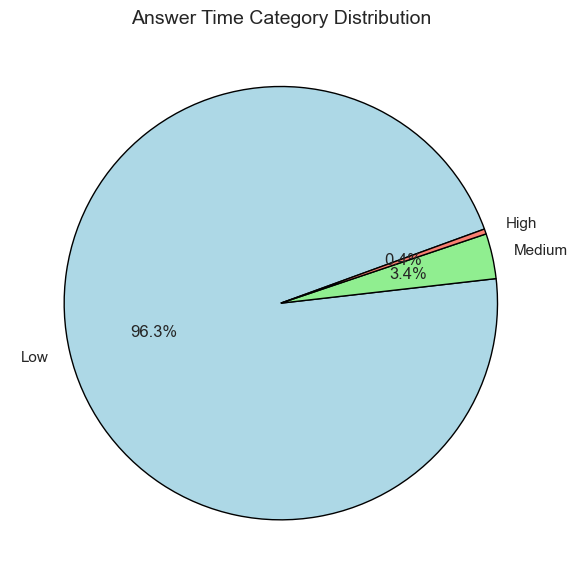

In [195]:
category_counts = df['Categorized Answer Time'].value_counts()

plt.figure(figsize=(6,6))
category_counts.plot(kind='pie', 
                     autopct='%1.1f%%', 
                     startangle=20, 
                     colors=['lightblue', 'lightgreen', 'salmon'], 
                     wedgeprops={'edgecolor': 'black'})  

plt.title('Answer Time Category Distribution', fontsize=14)
plt.ylabel('')  

plt.tight_layout()

plt.show()

In [196]:
max_asa=df.groupby('Project')['ASA'].max().to_frame()
max_asa

,ASA
Project,
Project A,102.787622
Project B,180.903391
Project C,36.917355


In [197]:
#Which project has the highest number of abandoned calls؟

max_calls_abandon=df.groupby('Project')['Calls Abandon'].max().to_frame()
max_calls_abandon

# answer:Project B has the highest number of abandoned calls (3101)


,Calls Abandon
Project,
Project A,1028
Project B,3101
Project C,55


In [198]:
#Calculate the difference between expected and actual calls
df["Forecast_Error"] = df["Forecasted Calls"] - df["Calls Offered"]
print(df[["Forecasted Calls", "Calls Offered", "Forecast_Error"]].describe())

#If Forecast_Error is positive, it means the forecasted calls were higher than the actual calls.
#If Forecast_Error is negative, it means the forecasted calls were lower than the actual calls.

       Forecasted Calls  Calls Offered  Forecast_Error
count        267.000000     267.000000      267.000000
mean        9127.606742    6535.149813     2592.456929
std         5926.564904    5255.978390     3045.051446
min          213.000000      81.000000   -14317.000000
25%         2674.000000    1834.500000      151.000000
50%        12477.000000    6601.000000     2143.000000
75%        13208.000000    8885.000000     5469.000000
max        17685.000000   30381.000000     8708.000000


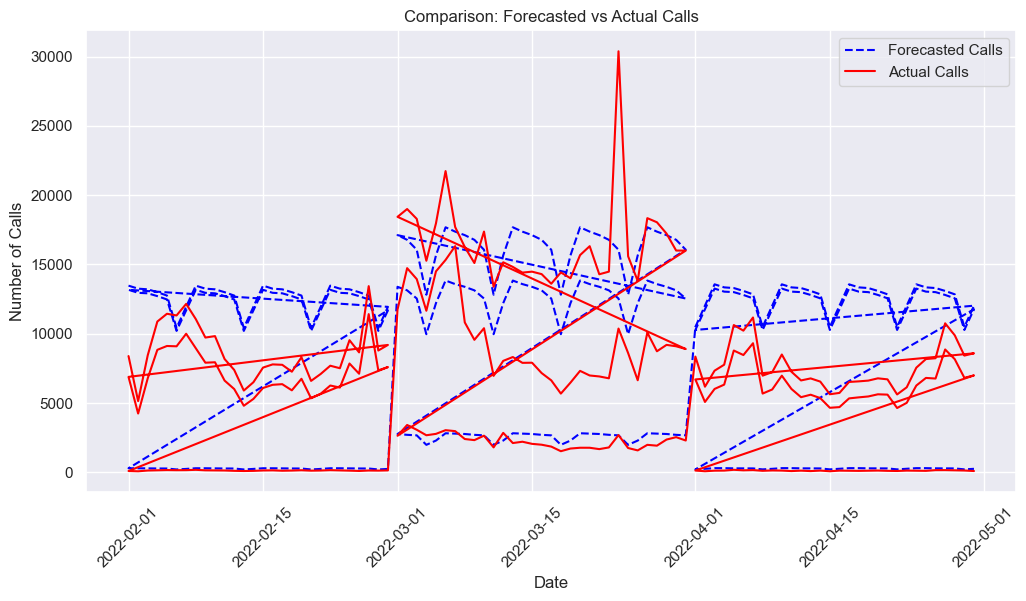

In [199]:
#visulization for comparison between expectations and reality
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["Forecasted Calls"], label="Forecasted Calls", linestyle="dashed", color="blue")
plt.plot(df["Date"], df["Calls Offered"], label="Actual Calls", color="red")

plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.title("Comparison: Forecasted vs Actual Calls")
plt.legend()
plt.xticks(rotation=45)  

plt.show()

In [200]:
#Examinations of previous graph
# Fluctuations in Actual Calls:
#The red lines show high variability in actual call volumes.
#Some days have sharp spikes, particularly around mid-March, indicating unexpected surges in calls.
# Forecasting Errors:
#The blue dashed lines (forecasted calls) generally follow a pattern but are often higher than actual calls.
#Large gaps between the red and blue lines indicate forecasting inaccuracies.
# Periods of Major Mismatches:
#Around mid-March, actual calls exceed forecasts, suggesting the forecasting model underestimated demand.
#In other periods, forecasts are significantly higher than actual calls, meaning overestimation and resource over-allocation.


#The forecasting model needs improvement to reduce overestimation and underestimation errors.
#The extreme spikes in actual calls might indicate unexpected events, requiring dynamic forecasting adjustments.
#Further analysis of seasonality, trends, and external factors could improve forecast accuracy.


In [201]:
monthly_analysis = df.groupby("Month_")[["Forecasted Calls", "Calls Offered"]].mean()

print(monthly_analysis)

#In April and February, there was an overestimation in the forecasts, which could lead to overallocation of resources in the call center.
#In March, the gap was smaller, indicating that the forecasts were more accurate.

          Forecasted Calls  Calls Offered
Month_                                   
April          8383.333333    4694.100000
February       8386.785714    5312.107143
March         10517.000000    9421.494624


In [202]:
# !pip install scikit-learn
import sklearn
print(sklearn.__version__)


1.6.1


In [203]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df["Calls Offered"], df["Forecasted Calls"])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2991.0936329588017


In [204]:
#Cont
# On average, the call volume predictions were off by around 2991 calls daily.
#The smaller the MAE, the more accurate the forecast.
#A high MAE value like 2991 calls indicates significant forecasting errors, which could lead to:
#Over- or under-staffing, affecting resource allocation.
#Longer wait times and potential service quality issues.

In [205]:
#Measuring efficiency: Calculating the ratio of Calls Handled / Calls Offered to see how responsive the team is.
df["Handling Efficiency"] = df["Calls Handled"] / df["Calls Offered"]

print(df[["Date", "Calls Offered", "Calls Handled", "Handling Efficiency"]].head())

        Date  Calls Offered  Calls Handled  Handling Efficiency
0 2022-02-01           8393           8381             0.998570
1 2022-02-02           5144           5134             0.998056
2 2022-02-03           8450           8436             0.998343
3 2022-02-04          10883          10614             0.975283
4 2022-02-05          11445          11393             0.995457


In [206]:
overall_efficiency = df["Handling Efficiency"].mean()
print(f"Overall Handling Efficiency: {overall_efficiency:.2%}")

Overall Handling Efficiency: 98.90%


In [207]:
monthly_efficiency = df.groupby("Month_")["Handling Efficiency"].mean()

print(monthly_efficiency)

#February had the highest efficiency (99.29%), meaning almost all calls offered were handled.
#March had the lowest efficiency (98.54%), but the difference is small.
#Overall, efficiency is very high (~99%), indicating a well-performing call center.


Month_
April       0.989126
February    0.992905
March       0.985436
Name: Handling Efficiency, dtype: float64


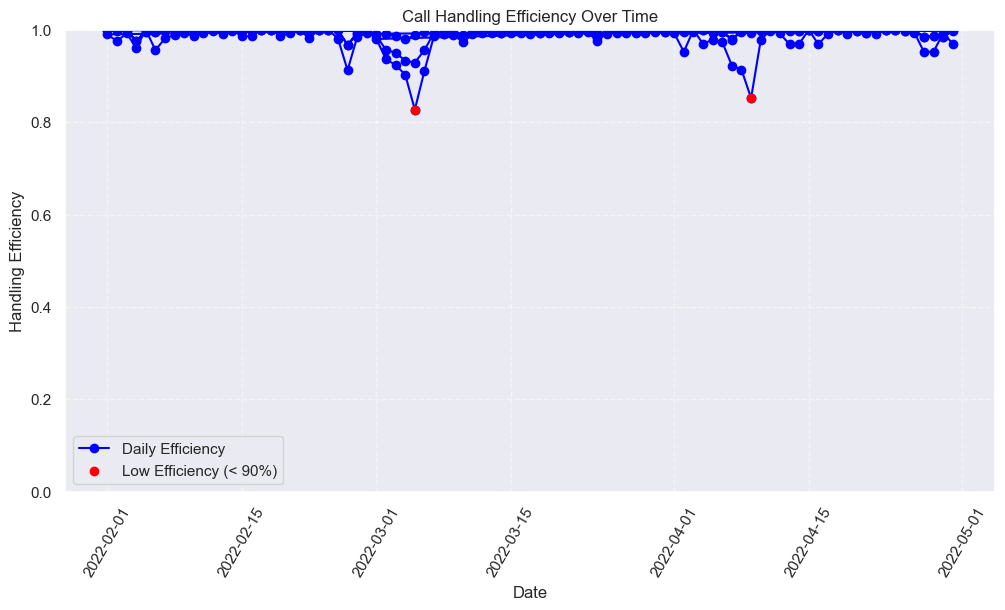

In [208]:
#Visualize  Performance  Over Time

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Handling Efficiency"], marker="o", linestyle="-", color="blue", label="Daily Efficiency")

# Highlight efficiency drops below 0.9
low_efficiency = df[df["Handling Efficiency"] < 0.9]
plt.scatter(low_efficiency["Date"], low_efficiency["Handling Efficiency"], color="red", label="Low Efficiency (< 90%)", zorder=3)

plt.xlabel("Date")
plt.ylabel("Handling Efficiency")
plt.title("Call Handling Efficiency Over Time")
plt.xticks(rotation=60)
plt.ylim(0, 1)

plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [209]:
# Since efficiency values range between 0 and 1
#Efficiency above 90% → Excellent performance.
#Efficiency between 70%-90% → Acceptable, but there is room for improvement.
#Efficiency below 70% → Significant performance issues, indicating a need for more staff or operational improvements.



#What Does This Graph Tell Us?
#High Overall Efficiency
#Most data points are close to 1.0, meaning that nearly all calls were handled.
  #This suggests a well-performing call center, where agents are able to answer most of the incoming calls.
   #Efficiency Drops at Certain Points

#There are some dips below 0.9, indicating days when fewer calls were handled compared to the number of calls received.
#These drops could be caused by:
#Higher call volume than expected
#Fewer available agents (staff shortages, peak hours)
#Longer handling times per call
#What Achieved High Efficiency?

#Balanced Staffing & Call Volume: Enough agents were available to handle calls.
#Efficient Call Handling: Calls were answered quickly, and issues were resolved effectively.
#Accurate Forecasting: The number of expected calls aligned well with actual call volume.

In [210]:
#Service Quality Evaluation
df["Service Level (%)"] = (df["Calls Handled With in Thrshold"] / df["Calls Handled"]) * 100

# Display key service metrics
print(df[["Date", "Calls Handled", "Calls Handled With in Thrshold", "ASA", "Service Level (%)"]].head())

        Date  Calls Handled  Calls Handled With in Thrshold        ASA  \
0 2022-02-01           8381                            8380   1.689178   
1 2022-02-02           5134                            5096   2.337164   
2 2022-02-03           8436                            8432   1.874822   
3 2022-02-04          10614                            7376  51.207744   
4 2022-02-05          11393                           11027   7.235232   

   Service Level (%)  
0          99.988068  
1          99.259836  
2          99.952584  
3          69.493122  
4          96.787501  


In [225]:
monthly_service = df.groupby("Month_")[["ASA", "Service Level (%)"]].mean()

print(monthly_service)

                ASA  Service Level (%)
Month_                                
April      7.050960          96.170708
February   5.783543          96.534343
March     14.425633          92.341733


In [ ]:
# February had the best performance (lowest ASA, highest Service Level %).
# March had the slowest response times, leading to a lower Service Level.

In [224]:
Project_service = df.groupby("Project")[["ASA", "Service Level (%)"]].mean()

print(Project_service)

                 ASA  Service Level (%)
Project                                
Project A  10.138750          94.456076
Project B  11.679904          94.198925
Project C   5.844132          96.199265


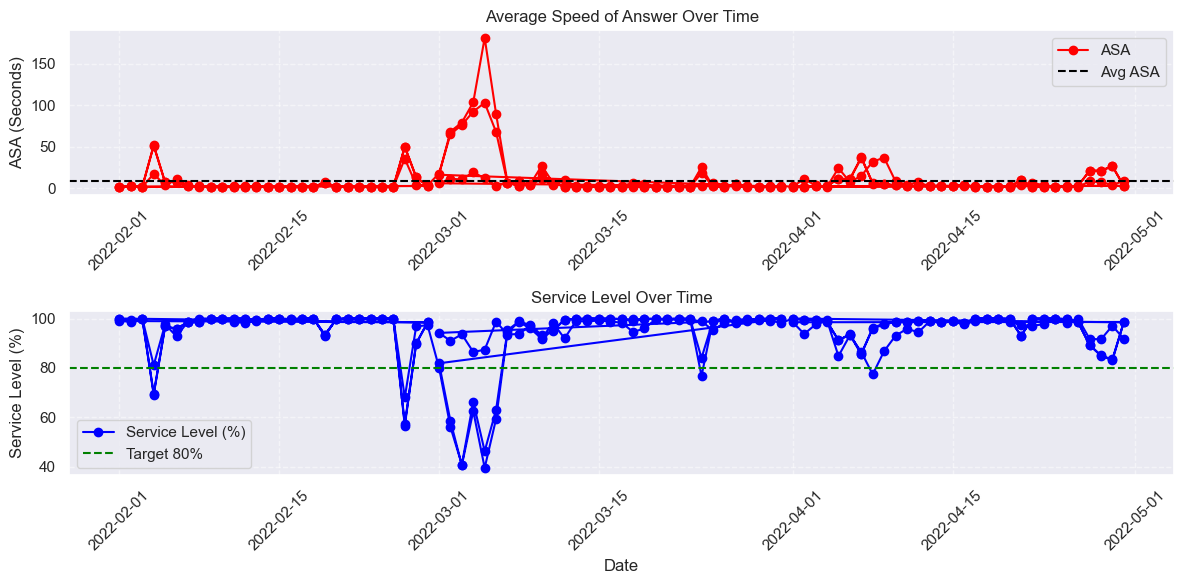

In [213]:
#Visualize Service Performance Over Time

plt.figure(figsize=(12, 6))

# ASA Trend
plt.subplot(2, 1, 1)
plt.plot(df["Date"], df["ASA"], marker="o", linestyle="-", color="red", label="ASA")
plt.axhline(y=df["ASA"].mean(), color="black", linestyle="--", label="Avg ASA")
plt.ylabel("ASA (Seconds)")
plt.title("Average Speed of Answer Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Service Level Trend
plt.subplot(2, 1, 2)
plt.plot(df["Date"], df["Service Level (%)"], marker="o", linestyle="-", color="blue", label="Service Level (%)")
plt.axhline(y=80, color="green", linestyle="--", label="Target 80%")
plt.ylabel("Service Level (%)")
plt.xlabel("Date")
plt.title("Service Level Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [214]:
# Calculate abandonment rate
df["Abandonment Rate (%)"] = (df["Calls Abandon"] / df["Calls Offered"]) * 100
print(df[["Date", "Calls Offered", "Calls Abandon", "ASA", "Abandonment Rate (%)"]].head())


#High Abandonment Rate (%) suggests many customers hung up before getting help.
#If ASA is high, customers likely got frustrated waiting and dropped the call.



        Date  Calls Offered  Calls Abandon        ASA  Abandonment Rate (%)
0 2022-02-01           8393             12   1.689178              0.142976
1 2022-02-02           5144             10   2.337164              0.194401
2 2022-02-03           8450             14   1.874822              0.165680
3 2022-02-04          10883            269  51.207744              2.471745
4 2022-02-05          11445             52   7.235232              0.454347


In [215]:
monthly_abandon = df.groupby("Month_")[["Abandonment Rate (%)", "ASA"]].mean()

print(monthly_abandon)
# February had the best performance (lowest ASA & abandonment rate).
# March had the worst performance (highest ASA & abandonment rate).

          Abandonment Rate (%)        ASA
Month_                                   
April                 1.087398   7.050960
February              0.709513   5.783543
March                 1.456375  14.425633


In [229]:
Project_performance = df.groupby("Project")[["Forecast_Error","Abandonment Rate (%)", "ASA","Service Level (%)","Handling Efficiency"]].mean()
Project_performance

,Forecast_Error,Abandonment Rate (%),ASA,Service Level (%),Handling Efficiency
Project,,,,,
Project A,4001.662921,0.734743,10.138750,94.456076,0.992653
Project B,3568.943820,1.058734,11.679904,94.198925,0.989413
Project C,206.764045,1.497622,5.844132,96.199265,0.985024


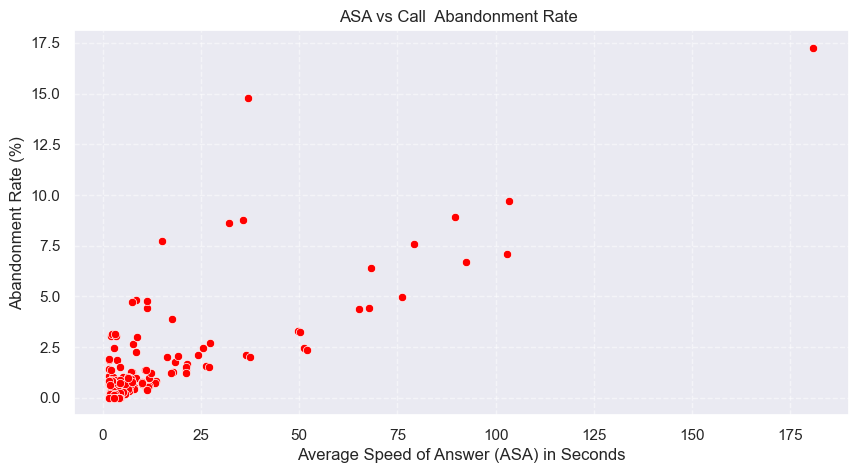

In [216]:
#Visualizing the Relationship Between ASA & Abandonment Rate

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['ASA'], y=df['Abandonment Rate (%)'], color='red' )
plt.title('ASA vs Call  Abandonment Rate ')
plt.xlabel('Average Speed of Answer (ASA) in Seconds')
plt.ylabel("Abandonment Rate (%)")
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

In [217]:
corr = df.select_dtypes('number').drop(columns=['Year'], errors='ignore').corr()
corr


,Forecasted Calls,Calls Offered,Calls Handled,Calls Handled With in Thrshold,Calls Abandon,ASA,Answer Time,Forecast_Error,Handling Efficiency,Service Level (%),Abandonment Rate (%)
Forecasted Calls,1.000000,0.858384,0.867120,0.885857,0.255994,0.137919,0.252911,0.464661,0.109257,-0.098756,-0.109257
Calls Offered,0.858384,1.000000,0.998815,0.943579,0.500347,0.369179,0.494066,-0.055405,-0.133550,-0.354301,0.133550
Calls Handled,0.867120,0.998815,1.000000,0.956626,0.457608,0.328209,0.452541,-0.036355,-0.096886,-0.320013,0.096886
Calls Handled With in Thrshold,0.885857,0.943579,0.956626,1.000000,0.220157,0.072957,0.194459,0.095452,0.101635,-0.051672,-0.101635
Calls Abandon,0.255994,0.500347,0.457608,0.220157,1.000000,0.905674,0.975383,-0.365394,-0.716149,-0.779678,0.716149
ASA,0.137919,0.369179,0.328209,0.072957,0.905674,1.000000,0.953843,-0.368799,-0.811434,-0.925339,0.811434
Answer Time,0.252911,0.494066,0.452541,0.194459,0.975383,0.953843,1.000000,-0.360555,-0.709015,-0.863217,0.709015
Forecast_Error,0.464661,-0.055405,-0.036355,0.095452,-0.365394,-0.368799,-0.360555,1.000000,0.443164,0.419341,-0.443164
Handling Efficiency,0.109257,-0.133550,-0.096886,0.101635,-0.716149,-0.811434,-0.709015,0.443164,1.000000,0.750356,-1.000000
Service Level (%),-0.098756,-0.354301,-0.320013,-0.051672,-0.779678,-0.925339,-0.863217,0.419341,0.750356,1.000000,-0.750356


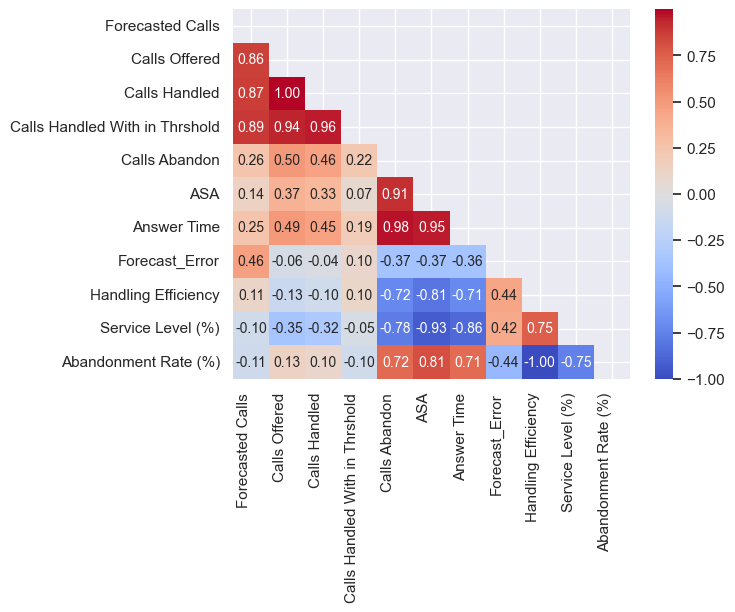

In [218]:

sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            cmap='coolwarm', 
            mask=np.triu(corr), 
            annot=True, 
            fmt=".2f",  
            annot_kws={"size": 10})  

plt.xticks(rotation=90, ha='right')  
plt.yticks(rotation=0)  
plt.show()

In [219]:
df.to_excel('./Salla Call Center Dataset edit.xlsx')